<a href="https://colab.research.google.com/github/Abdul-git25/digit-recognize/blob/main/fmnist_clf_nn_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="+3">Fashion MNIST Image Classification

<font size="+2">Fashion MNIST Dataset Details

The Fashion MNIST dataset is a dataset of 70,000 grayscale images of 10 different fashion categories. The images are low-resolution (28x28 pixels).

*   **Images:** 60,000 training images and 10,000 testing images.
*   **Resolution:** 28x28 pixels.
*   **Color:** Grayscale.
*   **Classes:** 10 fashion categories:
    0: T-shirt/top
    1: Trouser
    2: Pullover
    3: Dress
    4: Coat
    5: Sandal
    6: Shirt
    7: Sneaker
    8: Bag
    9: Ankle boot

<p style="color:red;"><font size="+2">
Setup</p>

This project requires Python 3.7 or above:

In [ ]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

And TensorFlow ≥ 2.8:

In [ ]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/ann` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<font size="+2">Building an Image Classifier Using the Sequential API

<font size="+1">1. Using Keras to load the dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `tf.keras.datasets`. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train.dtype

dtype('uint8')

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

Displaying the fashion item at index 32260:


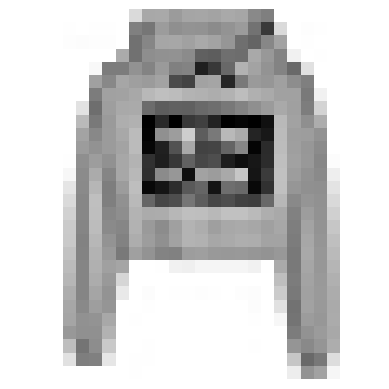

In [ ]:
# Randomly select and display a train item
import numpy as np

random_idx = np.random.randint(0, len(X_train))
print(f"Displaying the fashion item at index {random_idx}:")
plt.imshow(X_train[random_idx], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the image of the randomly selected item from the training set is:

In [ ]:
class_names[y_train[random_idx]]

'Pullover'

Let's take a look at a sample of the images in the dataset:

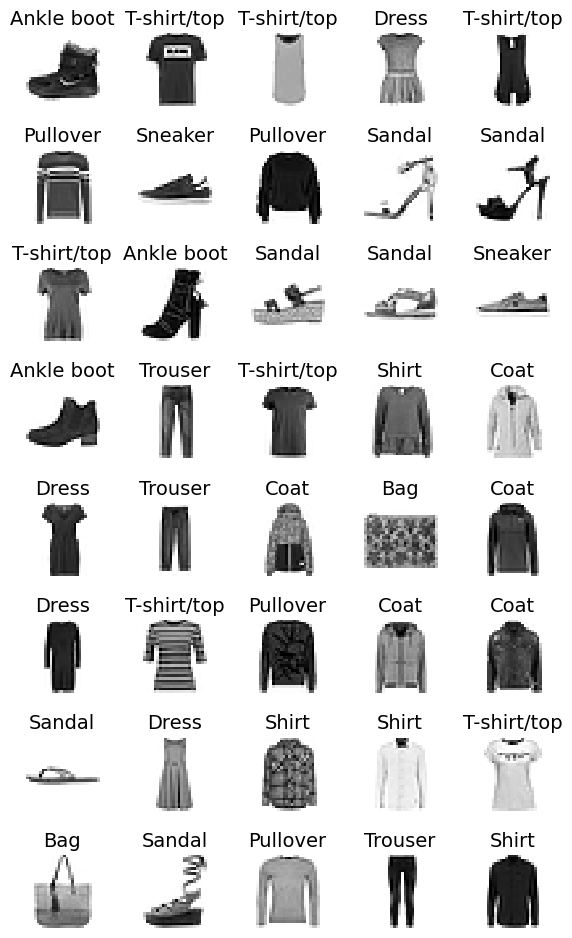

In [ ]:
# extra code – this cell generates and saves Figure 10–10

n_rows = 8
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

<font size="+1">2. Creating the model using the Sequential API

To create the model, use these steps:
```python
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

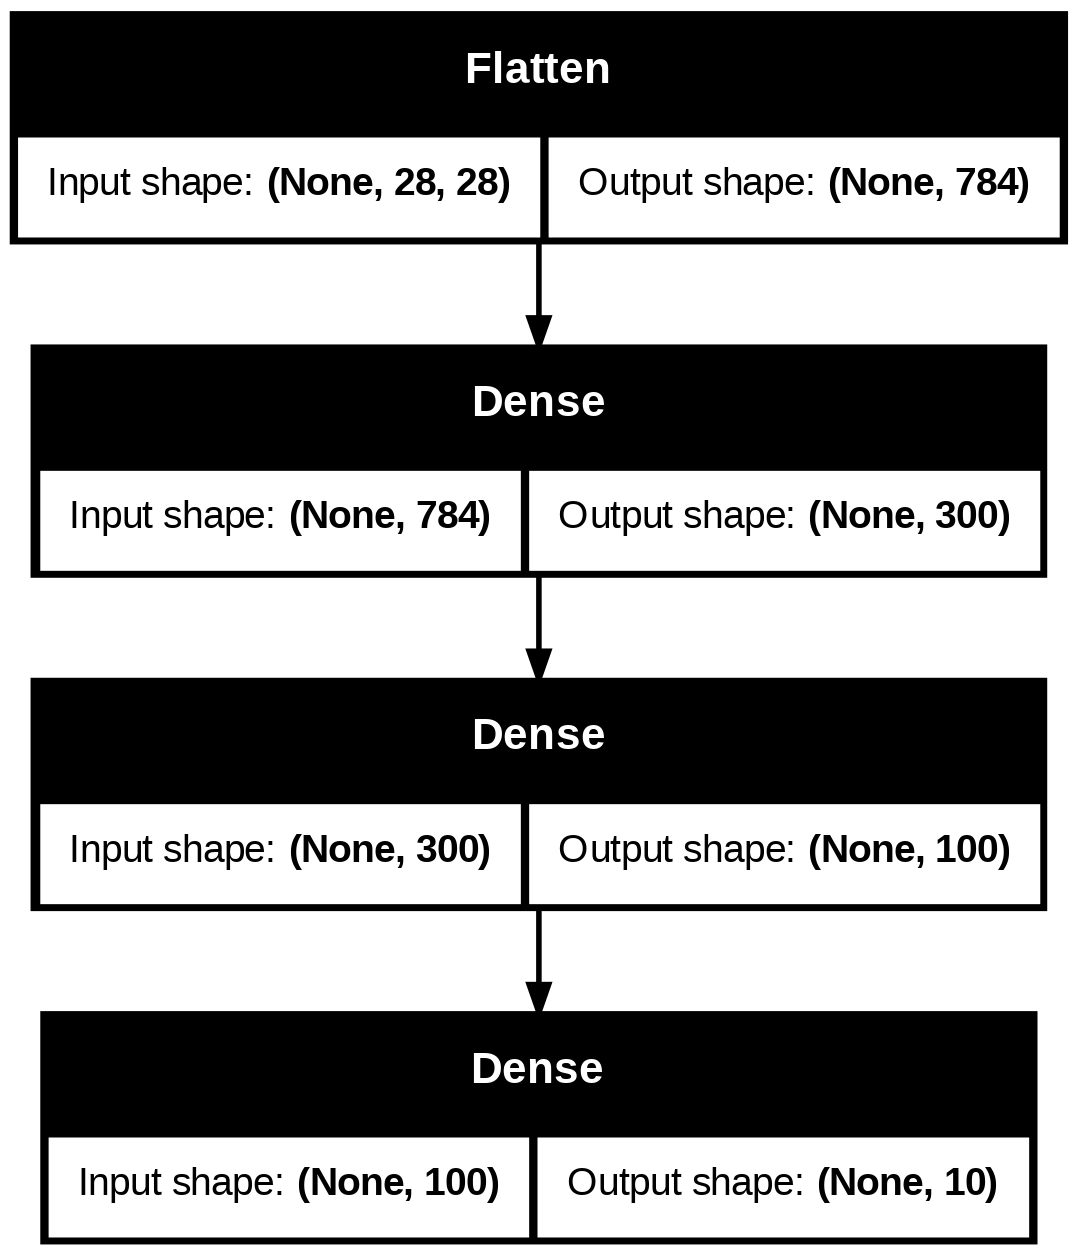

In [ ]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
#weights

In [ ]:
weights.shape

(784, 300)

In [ ]:
#biases

In [ ]:
biases.shape

(300,)

<font size="+1">3. Compiling the model

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:
```python
# extra code – this cell is equivalent to the previous cell

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
            optimizer=tf.keras.optimizers.SGD(),
            metrics=[tf.keras.metrics.sparse_categorical_accuracy])


In [ ]:
# extra code – shows how to convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Note: it's important to set `num_classes` when the number of classes is greater than the maximum class id in the sample.

In [ ]:
# extra code – shows how to convert one-hot vectors to class ids
import numpy as np
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)

array([0, 5, 1, 0])

<font size="+1">4. Training and evaluating the model

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6877 - loss: 0.9842 - val_accuracy: 0.8256 - val_loss: 0.5033
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8272 - loss: 0.5039 - val_accuracy: 0.8410 - val_loss: 0.4510
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8449 - loss: 0.4508 - val_accuracy: 0.8478 - val_loss: 0.4264
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8553 - loss: 0.4204 - val_accuracy: 0.8526 - val_loss: 0.4127
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8615 - loss: 0.3989 - val_accuracy: 0.8540 - val_loss: 0.4014
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8663 - loss: 0.3821 - val_accuracy: 0.8572 - val_loss: 0.3938
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.3679 - val_accuracy: 0.8596 - val_loss: 0.3868
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8759 - loss: 0.3553 - 

In [ ]:
# Calculate the number of batches processed per epoch during training
train_bpe = round(len(X_train) / 32)
train_bpe

1719

The number `{train_bpe}` in the output of the `model.fit()` cell represents the number of batches processed per epoch during training. This is calculated by dividing the total number of samples in the training set (55,000 in `X_train`) by the default batch size used by Keras (which is 32).

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


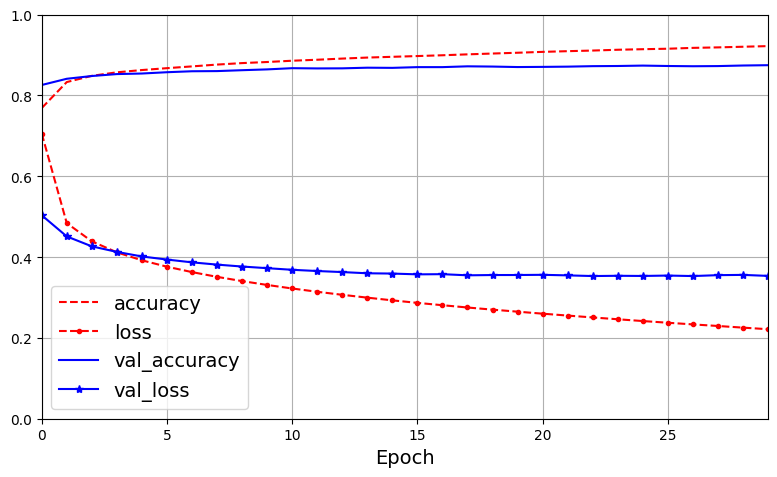

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot")  # extra code
plt.show()

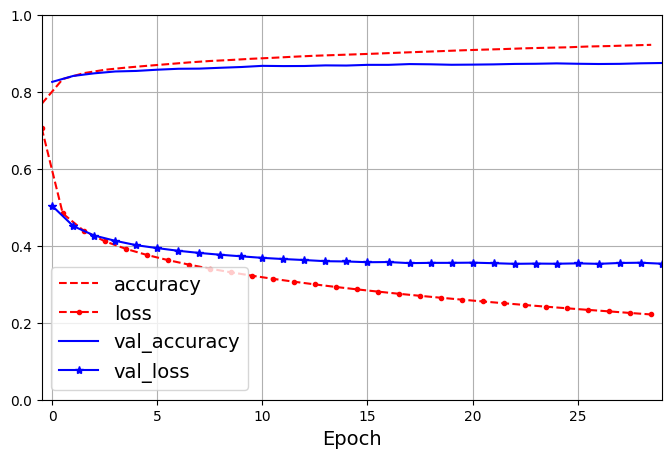

In [ ]:
# extra code – shows how to shift the training curve by -1/2 epoch
plt.figure(figsize=(8, 5))
for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
    epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
    plt.plot(epochs, history.history[key], style, label=key)
plt.xlabel("Epoch")
plt.axis([-0.5, 29, 0., 1])
plt.legend(loc="lower left")
plt.grid()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8694 - loss: 0.3769


[0.3733704686164856, 0.8711000084877014]

<font size="+1">5. Using the model to make predictions

In [ ]:
new_pred = int(input(f"Enter a number to test: "))

X_new = X_test[:new_pred]
y_proba = model.predict(X_new)
y_proba.round(2)

Enter a number to test: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.01, 0.  , 0.79],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.19, 0.  , 0.  , 0.  , 0.  , 0.  , 0.8 , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [ ]:
#new_class = int(input(f"Enter a class number to test (0-9): "))

y_new = y_test[:new_pred]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)

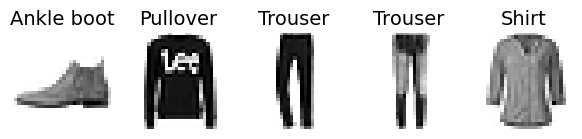

In [ ]:
# extra code – this cell generates and saves Figure 10–12
plt.figure(figsize=(7.2, 2.4))
# Use the first 'new_class' images from the test set
for index, image in enumerate(X_test[:new_pred]):
    plt.subplot(1, new_pred, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    # Use the true class name from the test set for the title
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [62]:
# Save the trained model
model.save('fashion_mnist_model.keras')
print("Model saved successfully!")

Model saved successfully!


### Loading the Saved Model in Another Environment

To use the trained model in a different environment, you need to have the saved model file (`fashion_mnist_model.keras` or `fashion_mnist_model.h5` if you saved it in the older HDF5 format) available in that environment.

Assuming you have the model file, you can load it using `tf.keras.models.load_model()`:

In [63]:
import tensorflow as tf

# Specify the path to your saved model file
model_path = 'fashion_mnist_model.keras'  # or 'fashion_mnist_model.h5'

# Load the model
loaded_model_external = tf.keras.models.load_model(model_path)

# Now you can use the loaded_model_external to make predictions
# For example, to predict on new data (X_new_external):
# predictions = loaded_model_external.predict(X_new_external)

print("Model loaded successfully in the external environment.")

Model loaded successfully in the external environment.


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Once the model is loaded, you can use it for inference (making predictions) on new data in that environment.

In [64]:
# Display parameters of the loaded model
print("Parameters of the loaded model:")
loaded_model.summary()

Parameters of the loaded model:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,612 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [65]:
# Function to load and evaluate the saved model
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('fashion_mnist_model.h5')

# Evaluate the loaded model on test data
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"Loaded model test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8694 - loss: 0.3769
Loaded model test accuracy: 0.8711


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
True label: Ankle boot (9)
Predicted label: Ankle boot (9)
Confidence: 0.9997


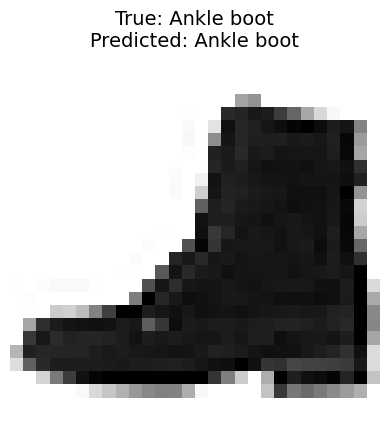

np.int64(9)

In [66]:
# Function to make predictions with the loaded model
def predict_with_loaded_model(model, X_data, true_label_index):
    """
    Make a prediction using the loaded model and display the result
    """
    prediction = model.predict(X_data[true_label_index:true_label_index+1])
    predicted_class = np.argmax(prediction[0])
    true_class = y_test[true_label_index]

    print(f"True label: {class_names[true_class]} ({true_class})")
    print(f"Predicted label: {class_names[predicted_class]} ({predicted_class})")
    print(f"Confidence: {np.max(prediction[0]):.4f}")

    # Display the image
    plt.imshow(X_test[true_label_index], cmap="binary")
    plt.axis('off')
    plt.title(f"True: {class_names[true_class]}\nPredicted: {class_names[predicted_class]}")
    plt.show()

    return predicted_class

# Test the loaded model with a random image
random_test_idx = np.random.randint(0, len(X_test))
predict_with_loaded_model(loaded_model, X_test, random_test_idx)

In [67]:
# Save model architecture and weights separately (optional)
# Save only the architecture
model_json = model.to_json()
with open("fashion_mnist_model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save only the weights
model.save_weights("fashion_mnist_model_weights.weights.h5")

print("Model architecture and weights saved separately!")

Model architecture and weights saved separately!


In [68]:
# Load model architecture and weights separately (optional)
from tensorflow.keras.models import model_from_json

# Load architecture
with open("fashion_mnist_model_architecture.json", "r") as json_file:
    loaded_model_json = json_file.read()

# Create model from architecture
loaded_model_from_json = model_from_json(loaded_model_json)

# Load weights
loaded_model_from_json.load_weights("fashion_mnist_model_weights.weights.h5")

# Compile the model (necessary after loading architecture + weights)
loaded_model_from_json.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

# Evaluate this model
test_loss, test_accuracy = loaded_model_from_json.evaluate(X_test, y_test)
print(f"Model loaded from JSON + weights - test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8694 - loss: 0.3769
Model loaded from JSON + weights - test accuracy: 0.8711
